<a href="https://colab.research.google.com/github/surui010203-dotcom/YIN-JUN-LONG/blob/main/YINJUNLONG50250335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print('train_images.shape=',train_images.shape)
print('test_images.shape=',test_images.shape)
print('train_labels.shape=',train_labels.shape)
print('test_labels.shape=',test_labels.shape)

train_images.shape= (60000, 28, 28)
test_images.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [4]:
num=train_images[6000]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]),end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 200 255 229   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 200 253 251 102   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 236 254 224  98   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   4  21 236 254 217  74   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  70 254 253 252  67   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  11 192 254 253 108   0   0   0   0   0   0   0   0

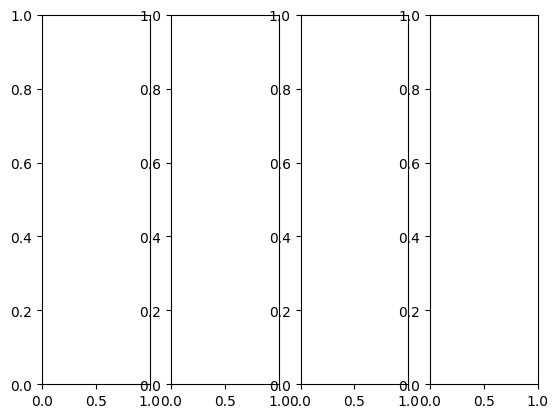

In [5]:
fig=plt.figure()
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

In [6]:
ax1.imshow(train_images[1000],cmap='Greys')
ax2.imshow(train_images[2000],cmap='Greys')
ax3.imshow(train_images[3000],cmap='Greys')
ax4.imshow(train_images[4000],cmap='Greys')

In [7]:
print('train_labels[:4]=',train_labels[:4])

train_labels[:4]= [5 0 4 1]


In [8]:
train_images,test_images=train_images/255,test_images/255

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [12]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8792 - loss: 0.4252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9645 - loss: 0.1231
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0536
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9865 - loss: 0.0430


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [17]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [18]:
model.fit(train_images,train_labels,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0203
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9956 - loss: 0.0190
